Crea un modelo de regresión lineal para predecir el consumo de combustible (litros por 100 kilómetros) de un vehículo basado en el peso del vehículo y la cilindrada del motor.

Variables:

* Peso (kg): Peso del vehículo.
* Cilindrada (cc): Volumen total de los cilindros del motor del vehículo.
* Consumo de Combustible (L/100km): Litros de combustible que el vehículo * consume para recorrer 100 kilómetros.

Los datos los vas a generar de forma sintética suponiendo que:

1. Vehículos más pesados y con mayor cilindrada tienden a consumir más combustible.
2. El consumo de combustible aumenta con el peso y la cilindrada del motor, pero a diferentes tasas.

Generación de los datos (1000 vehículos):

1. Generar pesos: media = 1500 kg, desviación estándar = 300 kg
2. Generar cilindradas: media = 1800 cc, desviación estándar = 400 cc
3. Generar consumo de combustible: base 6 L/100km + 0.005 L/kg + 0.002 L/cc + ruido (entre 0 y 0.5).
Visualiza los datos de los vehículos y la relación de consumo con cada característica, crea el modelo y valídalo.

# Generación de los datos

In [1]:
import numpy as np

np.random.seed(42)
samples = 1000

meanWeight, sigmaWeight = 1500, 300
meanCylinder, sigmaCylinder = 1800, 400

weight = np.random.normal(meanWeight, sigmaWeight, samples)
cylinder = ((np.random.normal(meanCylinder, sigmaCylinder, samples)//100)*100).round()
noise = np.random.uniform(0, 0.5, samples)

fuelConsumption = 6 + (0.005 * weight) + (0.002 * cylinder) + noise

print(weight)
print(cylinder)
print(fuelConsumption)

[1649.0142459  1458.52070965 1694.30656143 1956.90895692 1429.75398758
 1429.75891292 1973.76384465 1730.23041875 1359.15768422 1662.76801308
 1360.97469216 1360.28107393 1572.58868147  926.0159266   982.52465025
 1331.31374123 1196.1506639  1594.27419978 1227.59277734 1076.3088896
 1939.69463068 1432.26710985 1520.25846141 1072.57554414 1336.68518264
 1533.27677691 1154.70192677 1612.7094055  1319.80839302 1412.49187506
 1319.48801633 2055.68345535 1495.95083258 1182.68672131 1746.76347363
 1133.74690501 1562.6590785   912.09896284 1101.54418533 1559.05837076
 1721.539974   1551.41048436 1465.30551528 1409.66889132 1056.44340289
 1284.04673748 1361.80836871 1817.13666787 1603.08548687  971.08795339
 1597.22519082 1384.47531588 1296.92339991 1683.50288665 1809.29985675
 1779.38403573 1248.23474303 1407.23628724 1599.37902942 1792.66353814
 1356.24772865 1444.302307   1168.0995078  1141.13801278 1743.75774672
 1906.87200857 1478.39696353 1801.05986937 1608.49080751 1306.46407362
 1608.4

#Visualización

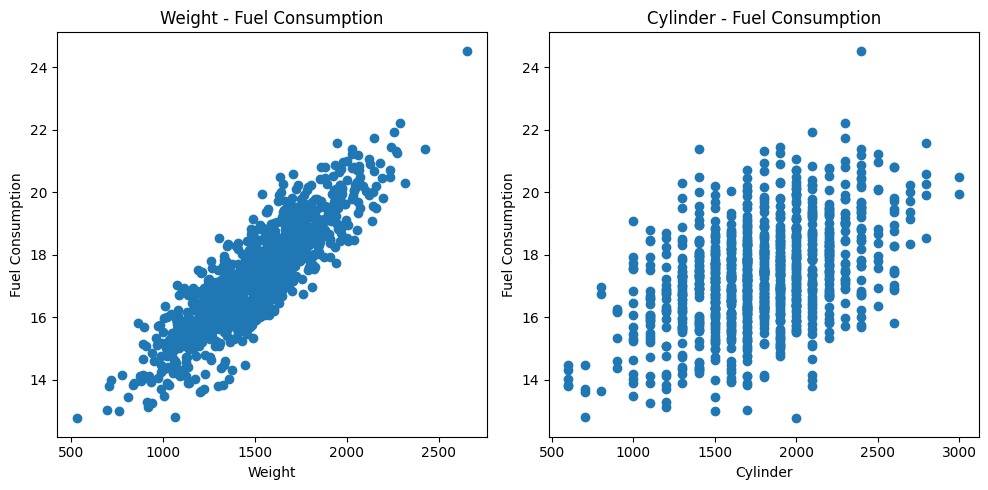

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Peso vs Consumo
axs[0].scatter(weight, fuelConsumption)
axs[0].set_title('Weight - Fuel Consumption')
axs[0].set_xlabel('Weight')
axs[0].set_ylabel('Fuel Consumption')

# Cilindrada vs Consumo
axs[1].scatter(cylinder, fuelConsumption)
axs[1].set_title('Cylinder - Fuel Consumption')
axs[1].set_xlabel('Cylinder')
axs[1].set_ylabel('Fuel Consumption')

plt.tight_layout()
plt.show()

#Dividir los datos

In [3]:
from sklearn.model_selection import train_test_split

#Se debería de normalizar los datos por las distintas unidades de cada variable
X = np.column_stack((weight, cylinder))
y = fuelConsumption

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Creación del modelo

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

# Evalúa el modelo

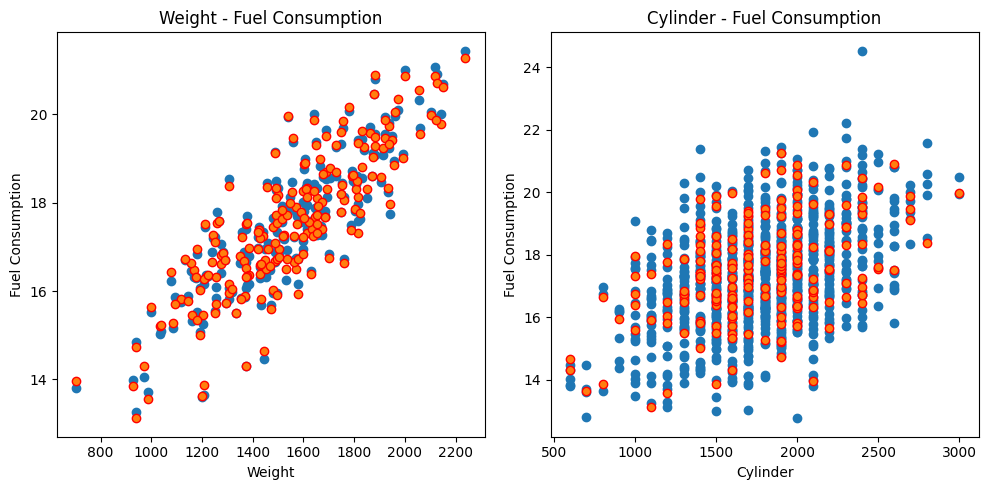

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

y_pred = model.predict(X_test)

# Peso vs Consumo
axs[0].scatter(X_test[:,0], y_test)
axs[0].set_title('Weight - Fuel Consumption')
axs[0].set_xlabel('Weight')
axs[0].set_ylabel('Fuel Consumption')
axs[0].scatter(X_test[:,0], y_pred, edgecolor='red')

# Cilindrada vs Consumo
axs[1].scatter(X[:,1], y)
axs[1].set_title('Cylinder - Fuel Consumption')
axs[1].set_xlabel('Cylinder')
axs[1].set_ylabel('Fuel Consumption')
axs[1].scatter(X_test[:,1], y_pred, edgecolor='red')

plt.tight_layout()
plt.show()

In [6]:
from sklearn import metrics

y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("Rendimiento del Modelo")
print("--------------------------------------")
print(f'Error absoluto medio = {mae}')
print(f'Error cuadrático medio = {mse}')
print(f'Coeficiente de determinación =  {r2}')

Rendimiento del Modelo
--------------------------------------
Error absoluto medio = 0.12146892843757998
Error cuadrático medio = 0.019564561065254785
Coeficiente de determinación =  0.9923834812935924
